In [1]:
import pandas as pd
import seaborn as sns

In [3]:
hormones = ['ABA', 'ACC', 'Cytokinin', 'GA', 'IAA']
dfs = []
for hormone in hormones:
    pareto_df = pd.read_csv(hormone + '-pareto.csv')
    pareto_df = pareto_df[['Accession', 'Condition', 'Distance.squared', 'Alpha']]
    pareto_df = pareto_df.groupby(['Accession', 'Condition']).agg('mean').reset_index()
    na_df = pd.read_csv(hormone + '-na.csv')
    na_df = na_df[na_df['Tissue'] == 'root']
    na_df = na_df[['Accession', 'Condition', 'Na/K.ratio']]
    na_df = na_df.groupby(['Accession', 'Condition']).agg('mean').reset_index()
    df = pd.merge(pareto_df, na_df)
    #df = pd.merge(pareto_df, na_df, on=['Accession', 'Condition'])
    #print(df)
    dfs.append(df)

full_df = pd.concat(dfs).dropna()
full_df = full_df[['Accession', 'Condition', 'Distance.squared', 'Alpha', 'Na/K.ratio']]
#full_df = full_df.groupby(['Accession', 'Condition', 'Day']).agg('mean').reset_index()
print(full_df)

  Accession Condition  Distance.squared     Alpha  Na/K.ratio
0    la1511   S+10aba          0.004770  0.408333    2.651132
1    la1511    S+1aba          0.343746  0.489000    1.647623
2    la1511   S+noaba          1.997830  0.405000    1.113491
3      m058   S+10aba          0.364455  0.376250    1.679087
4      m058    S+1aba          0.388467  0.708000    1.445317
5      m058   S+noaba          2.400757  0.398000    1.199586
6      m248   S+10aba          2.871497  0.278889    1.640845
7      m248    S+1aba          8.265391  0.248000    1.253072
8      m248   S+noaba         16.259288  0.426667    1.263683
0    la1511    S+1acc          0.045607  0.742857    1.010507
1    la1511    S+5acc          1.111218  0.628571    3.099329
2    la1511   S+noacc          6.727535  0.417143    0.988057
3      m058    S+1acc          1.498822  0.670000    1.534946
4      m058    S+5acc          0.588394  0.613333    1.401677
5      m058   S+noacc          5.595619  0.394000    1.173743
6      m

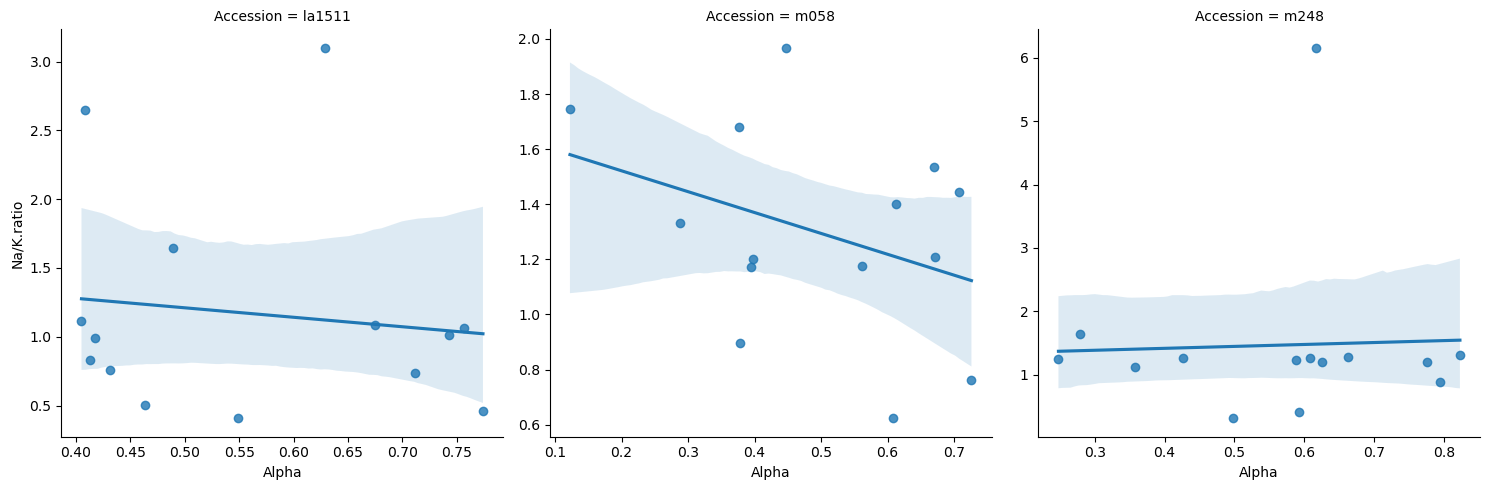

In [8]:
sns.lmplot(x='Alpha', 
           y='Na/K.ratio', 
           col='Accession',
           data=full_df, 
           facet_kws={'sharex' : False, 'sharey' : False})